# Gravitational tensor produced by a prism

This code illustrates how to compute the gravitational tensor and its invariants (Pedersen and Rasmussen, 1991) produced by homogeneous rectangular prisms.

### Things we have to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gravmag.models import rectangular_prism as rp
from gravmag import plot_functions as plf
from gravmag import data_structures

### Model

In [2]:
# Create a model formed three prisms
model = {
    "x1": np.array([  2000, -10000,  -3000]),
    "x2": np.array([  3000,  10000,  -2000]),
    "y1": np.array([ -2500,   1500, -10000]),
    "y2": np.array([ -1500,   2500,   1500]),
    "z1": np.array([    10,     10,     10]),
    "z2": np.array([  1010,   1010,   1010]),
}

density = np.array([2000, 2000, 2000]) # 2000 kg/m³ = 2 g/cm³

### Points were we compute the synthetic data

In [3]:
# number of points along x and y
shape = (100, 100)

# minimum x, maximum x, minimum y and maximum y
area = [-5000, 5000, -4000, 6000]

# grid of computation points
coordinates_grid = data_structures.grid_xy(area=area, shape=shape, z0=-150)

### Synthetic data

In [5]:
# Compute the vertical component of acceleration
gz = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='z'
)

# Compute the second derivatives
gxx = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='xx'
)
gxy = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='xy'
)
gxz = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='xz'
)
gyy = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='yy'
)
gyz = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='yz'
)
gzz = rp.grav(
    coordinates = data_structures.grid_xy_to_full_flatten(
        grid=coordinates_grid,
        ordering='xy'
    ),
    prisms=model, density=density, field='zz'
)

### Plot the data

In [6]:
# coordinates rearranged for plotting
# they are "views' of the original coordinates in 'coordinates_grid'
X, Y = data_structures.grid_xy_to_full_matrices_view(
    x = coordinates_grid['x'],
    y = coordinates_grid['y'],
    shape = coordinates_grid['shape']
)

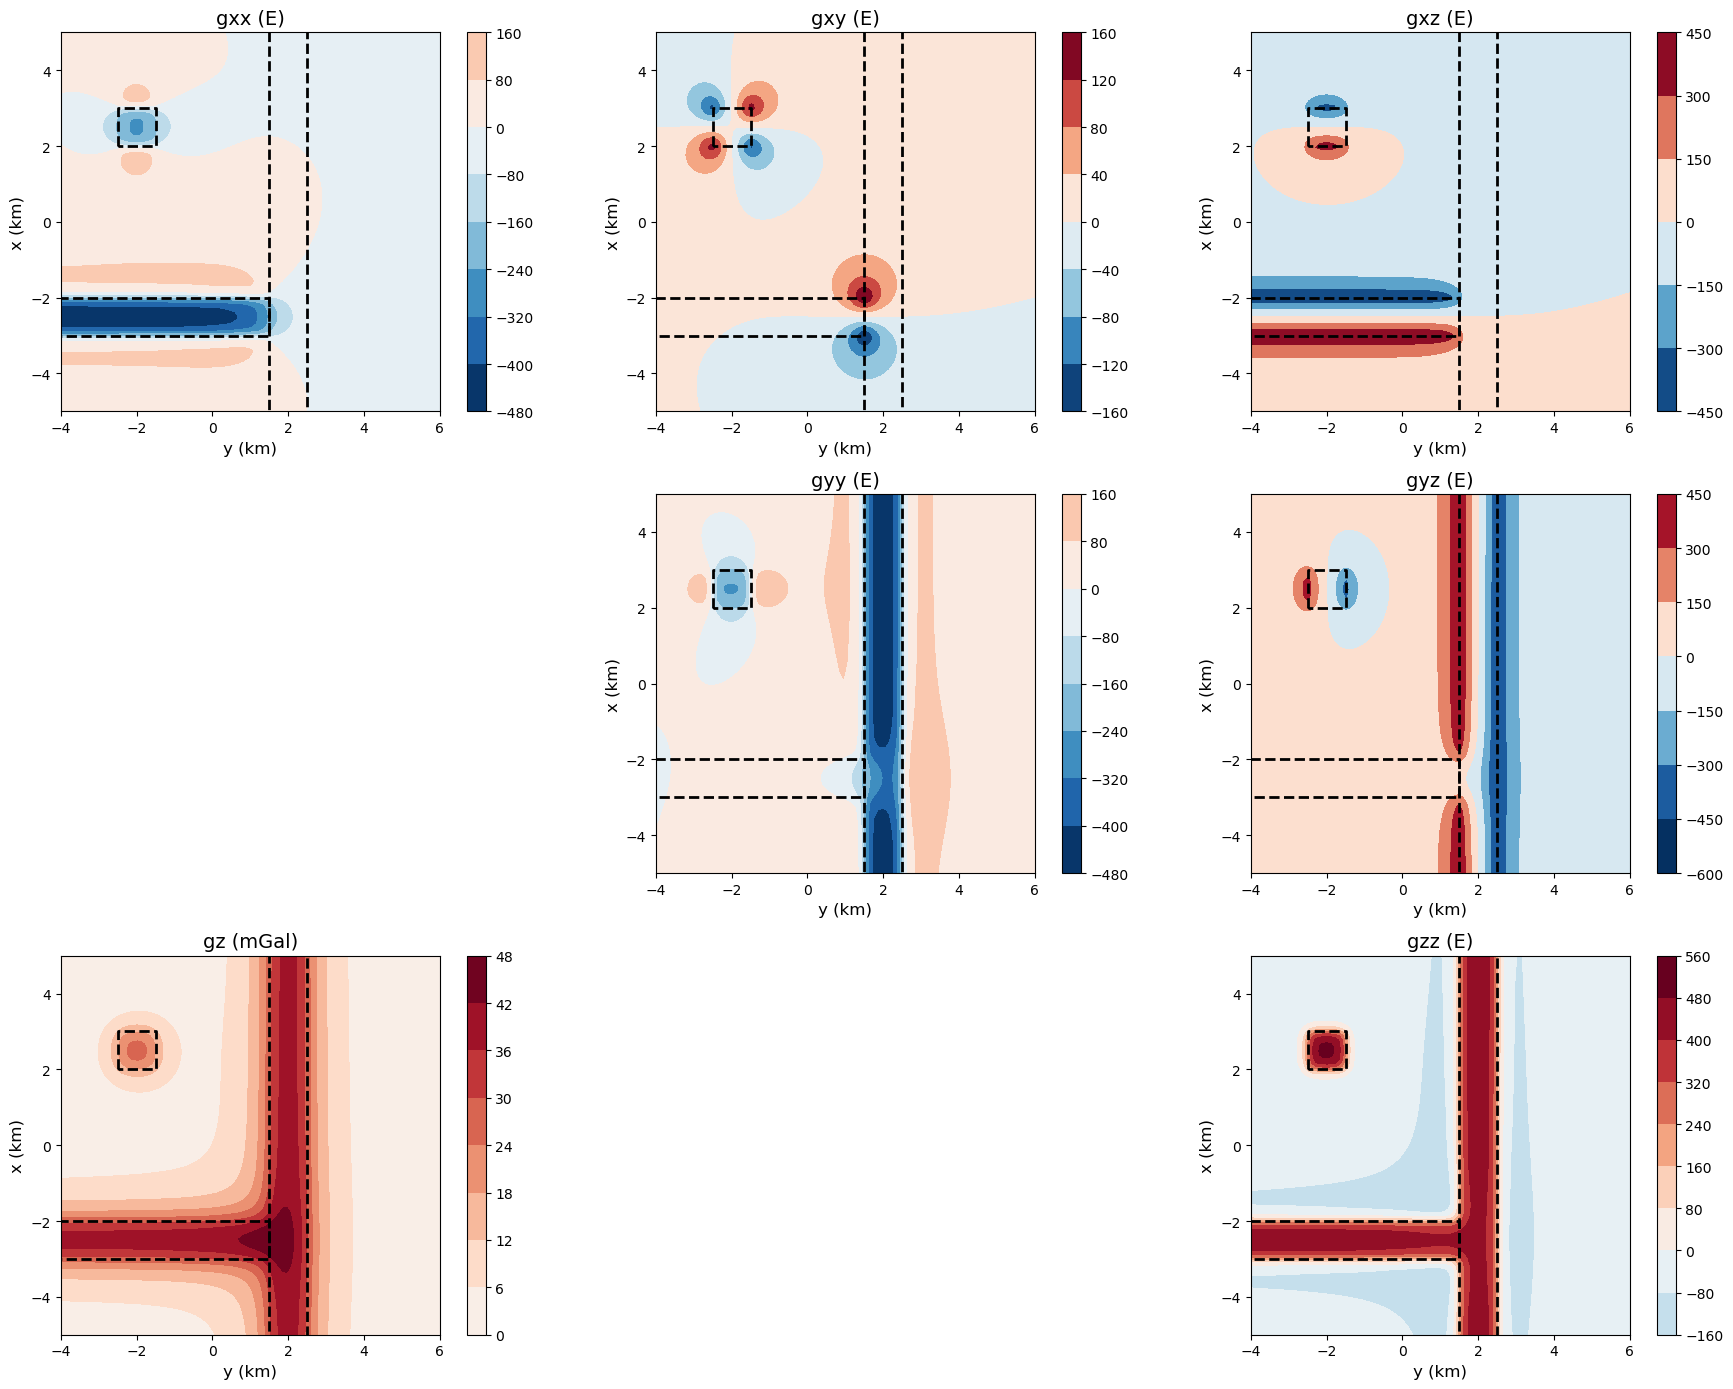

In [8]:
fields = [gxx, gxy, gxz, gyy, gyz, gzz, gz]
windows = [1, 2, 3, 5, 6, 9, 7]
titles = ['gxx (E)', 'gxy (E)', 'gxz (E)', 'gyy (E)', 'gyz (E)', 'gzz (E)', 'gz (mGal)']

plt.figure(figsize=(18,14))

for w, window in enumerate(windows):
    bounds = np.max(np.abs(fields[w]))
    plt.subplot(3,3,window)
    plt.title(titles[w], fontsize=14)
    plt.axis('scaled')
    plt.contourf(Y*0.001, X*0.001, 
                 data_structures.grid_xy_full_flatten_to_matrix(
                     data=fields[w], ordering='xy', shape=coordinates_grid['shape']
                 ), 
                 cmap='RdBu_r', vmin=-bounds, vmax=bounds)
    plt.colorbar()
    plf.model_boundaries(model, m2km=True)
    plt.ylim(0.001*coordinates_grid['area'][0], 0.001*coordinates_grid['area'][1])
    plt.xlim(0.001*coordinates_grid['area'][2], 0.001*coordinates_grid['area'][3])
    plt.ylabel('x (km)', fontsize=12)
    plt.xlabel('y (km)', fontsize=12)

plt.tight_layout()

plt.show()

### Compute tensor invariants

In [9]:
# compute the Tensor invariants presented by Pedersen and Rasmussen (1990)
I0 = gxx + gyy + gzz
I1 = gxx*gyy + gyy*gzz + gxx*gzz - gxy**2 - gyz**2 - gxz**2
I2 = gxx*(gyy*gzz - gyz**2) + gxy*(gyz*gxz - gxy*gzz) + gxz*(gxy*gyz - gxz*gyy)
I = -((I2/2.)**2)/((I1/3.)**3)

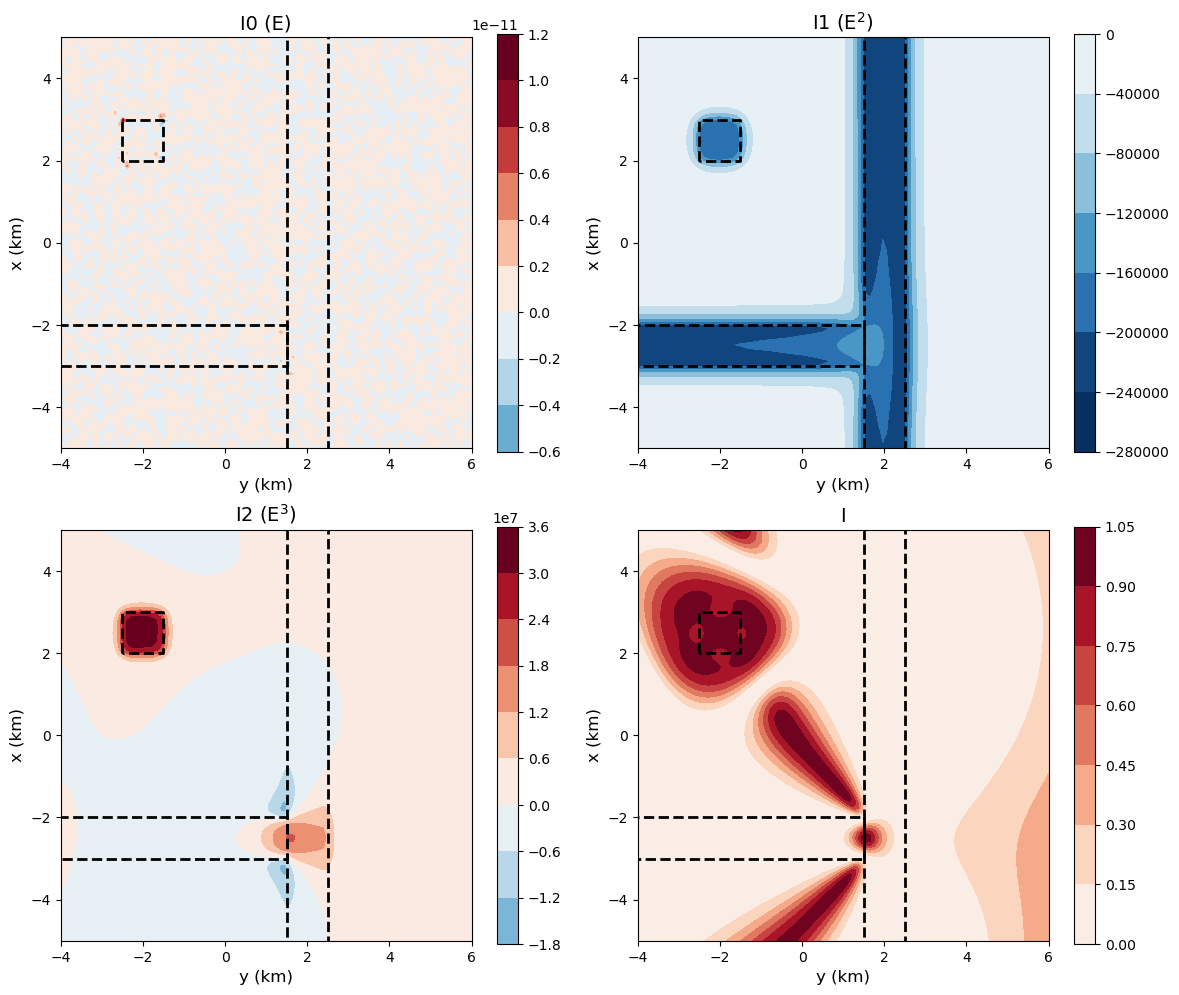

In [10]:
fields = [I0, I1, I2, I]
windows = [1, 2, 3, 4]
titles = ['I0 (E)', 'I1 (E$^{2}$)', 'I2 (E$^{3}$)', 'I']

plt.figure(figsize=(12,10))

for w, window in enumerate(windows):
    bounds = np.max(np.abs(fields[w]))
    plt.subplot(2,2,window)
    plt.title(titles[w], fontsize=14)
    plt.axis('scaled')
    plt.contourf(Y*0.001, X*0.001, 
                 data_structures.grid_xy_full_flatten_to_matrix(
                     data=fields[w], ordering='xy', shape=coordinates_grid['shape']
                 ), 
                 cmap='RdBu_r', vmin=-bounds, vmax=bounds)
    plt.colorbar()
    plf.model_boundaries(model, m2km=True)
    plt.ylim(0.001*coordinates_grid['area'][0], 0.001*coordinates_grid['area'][1])
    plt.xlim(0.001*coordinates_grid['area'][2], 0.001*coordinates_grid['area'][3])
    plt.ylabel('x (km)', fontsize=12)
    plt.xlabel('y (km)', fontsize=12)

plt.tight_layout()

plt.show()